# Time series forecasing in Tensorflow

Thao t√°c tr√™n file EURUSD.csv ƒë·ªÉ t·∫°o ra file m·ªõi l√† EURUSD_new.csv


In [52]:
import pandas as pd
df = pd.read_csv("D:/Github/Forex-prediction-EURUSD/data/EURUSD.csv")

df.head(5)


Date      Open      High       Low     Close  Adj Close  Volume
0  2004-01-01  1.259002  1.260796  1.247396  1.258194   1.258194     0.0
1  2004-01-02  1.258194  1.262802  1.252693  1.258194   1.258194     0.0
2  2004-01-05  1.263903  1.269406  1.263695  1.268698   1.268698     0.0
3  2004-01-06  1.268907  1.280803  1.267202  1.272103   1.272103     0.0
4  2004-01-07  1.272394  1.273999  1.262499  1.264095   1.264095     0.0

# C√°c thao t√°c ph√¢n t√≠ch, x·ª≠ l√Ω v√† tr·ª±c quan d·ªØ li·ªáu 

In [53]:
# ƒê·ªïi c·ªôt Date sang Index
df.Date = pd.to_datetime(df.Date, dayfirst = False) 
df.set_index("Date", inplace = True)

df.head(5)

Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2004-01-01  1.259002  1.260796  1.247396  1.258194   1.258194     0.0
2004-01-02  1.258194  1.262802  1.252693  1.258194   1.258194     0.0
2004-01-05  1.263903  1.269406  1.263695  1.268698   1.268698     0.0
2004-01-06  1.268907  1.280803  1.267202  1.272103   1.272103     0.0
2004-01-07  1.272394  1.273999  1.262499  1.264095   1.264095     0.0

In [54]:
eurusd_prices = pd.DataFrame(df["Open"]).rename(columns={"Open": "Price"})

eurusd_prices.head(5)

Price
Date                
2004-01-01  1.259002
2004-01-02  1.258194
2004-01-05  1.263903
2004-01-06  1.268907
2004-01-07  1.272394

In [55]:
from datetime import date
d0 = date(2022, 10, 14)
d1 = date(2004, 1, 1)
delta = abs(d0 - d1)

print("S·ªë ng√†y t·ª´ 1/1/2004 -> 14/10/2022     : " + str(delta.days + 1) + " ng√†y")

print("")

print("D·ªØ li·ªáu c√≥ trong d·ªØ li·ªáu hi·ªán t·∫°i g·ªìm : " + str(len(df)) + " ng√†y (ƒê√£ bao g·ªìm gi√° tr·ªã Null)")

print("")

print("D·ªØ li·ªáu thi·∫øu                         : " + str(delta.days + 1- len(df)) + " ng√†y")

S·ªë ng√†y t·ª´ 1/1/2004 -> 14/10/2022     : 6862 ng√†y

D·ªØ li·ªáu c√≥ trong d·ªØ li·ªáu hi·ªán t·∫°i g·ªìm : 4903 ng√†y (ƒê√£ bao g·ªìm gi√° tr·ªã Null)

D·ªØ li·ªáu thi·∫øu                         : 1959 ng√†y


In [56]:
time_sdata = pd.date_range("01/01/2004", periods=6862, freq="D") # 6862 l√† s·ªë ng√†y t√≠nh t·ª´ 1/1/2004 -> 14/10/2022 
data = pd.DataFrame(index=time_sdata)
data["Date"] = time_sdata 
data.set_index("Date", inplace = True)

In [57]:
import numpy as np 
# Kh·ªüi t·∫°o c√°c c·ªôt m·ªõi trong data 
data["Open"] = [np.NaN]*len(data)
data["High"] = [np.NaN]*len(data)
data["Low"] = [np.NaN]*len(data)
data["Close"] = [np.NaN]*len(data)
data["Adj Close"] = [np.NaN]*len(data)
data["Volume"] = [np.NaN]*len(data)

In [58]:
# Chuy·ªÉn d·ªØ li·ªáu t·ª´ df sang data (C√°c d·ªØ li·ªáu k c√≥ ·ªü df th√¨ t∆∞∆°ng ·ª©ng ·ªü data s·∫Ω l√† NaN)
for i in range(len(df)):
    for j in range(i, len(data)):
        if df.index[i] == data.index[j]:
            data[:][j:j+1] = df[:][i:i+1]
            break 
        
data

Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2004-01-01  1.259002  1.260796  1.247396  1.258194   1.258194     0.0
2004-01-02  1.258194  1.262802  1.252693  1.258194   1.258194     0.0
2004-01-03       NaN       NaN       NaN       NaN        NaN     NaN
2004-01-04       NaN       NaN       NaN       NaN        NaN     NaN
2004-01-05  1.263903  1.269406  1.263695  1.268698   1.268698     0.0
...              ...       ...       ...       ...        ...     ...
2022-10-10  0.973501  0.975229  0.968251  0.973501   0.973501     0.0
2022-10-11  0.971006  0.975810  0.967399  0.971006   0.971006     0.0
2022-10-12  0.970017  0.973302  0.966968  0.970017   0.970017     0.0
2022-10-13  0.970798  0.979509  0.963595  0.970798   0.970798     0.0
2022-10-14  0.978186  0.980873  0.971251  0.972384   0.972384     0.0

[6862 rows x 6 columns]

In [59]:
# L∆∞u l·∫°i d·ªØ li·ªáu m·ªõi  
#data.to_csv("D:/Github/Forex-prediction-EURUSD/data/EURUSD_new.csv")

Thao t√°c tr√™n file EURUSD_new.csv, D·ªØ li·ªáu thao t√°c l∆∞u v√†o bi·∫øn data

In [60]:
data.isnull().sum()

Open         1989
High         1989
Low          1989
Close        1989
Adj Close    1989
Volume       1989
dtype: int64

In [61]:
data.describe()

Open         High          Low        Close    Adj Close  Volume
count  4873.000000  4873.000000  4873.000000  4873.000000  4873.000000  4873.0
mean      1.247380     1.252041     1.242237     1.247390     1.247390     0.0
std       0.123629     0.124361     0.124143     0.123625     0.123625     0.0
min       0.959619     0.967006     0.072902     0.959619     0.959619     0.0
25%       1.137139     1.140901     1.133800     1.137139     1.137139     0.0
50%       1.236598     1.240325     1.230300     1.236308     1.236308     0.0
75%       1.336095     1.340986     1.331079     1.336112     1.336112     0.0
max       1.598184     1.602821     1.587402     1.598798     1.598798     0.0

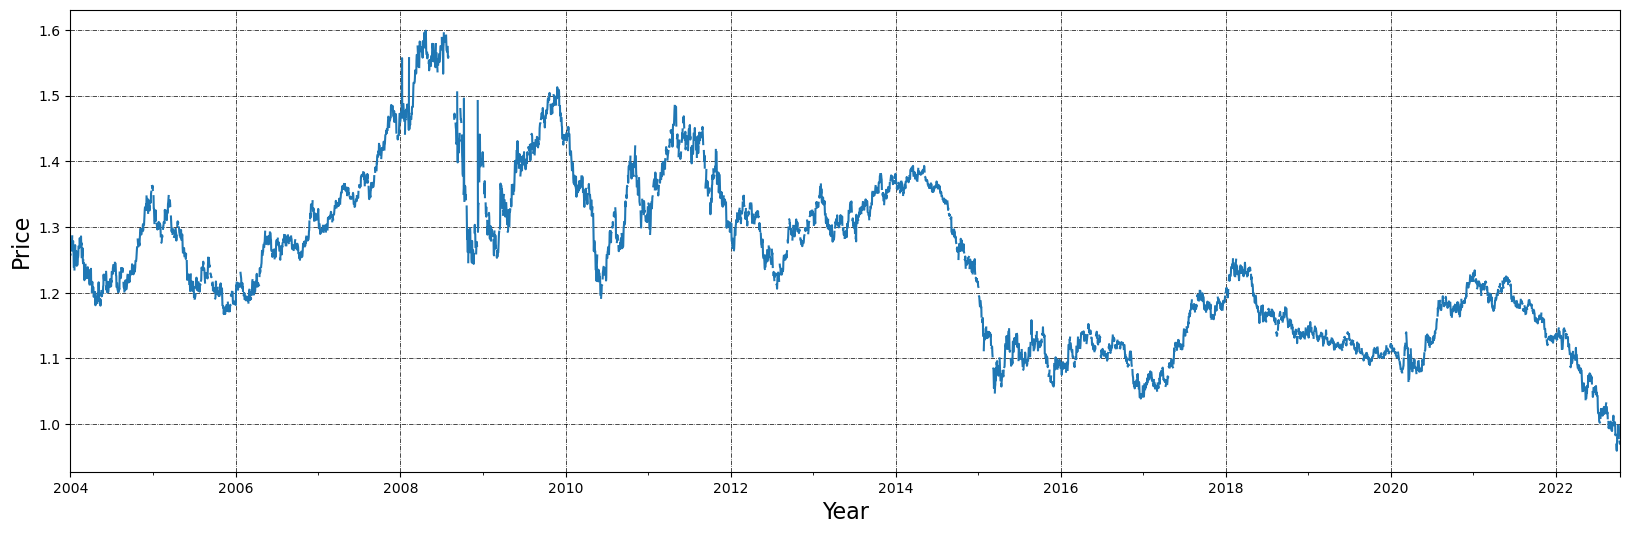

In [62]:
# Tr·ª±c quan c·ªôt Close trong data 
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

data['Close'].plot(figsize=(20, 6))

plt.ylabel('Price', fontsize=16)
plt.xlabel('Year', fontsize=16)

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

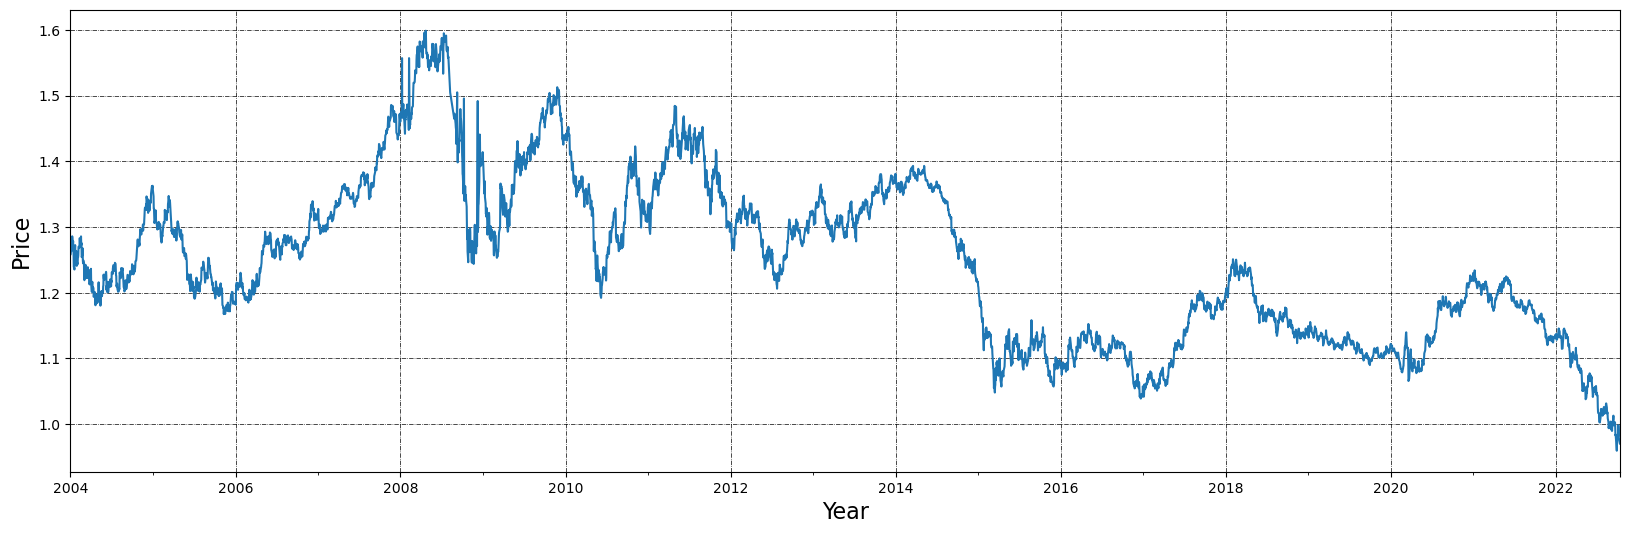

In [63]:
# ƒêi·ªÅn khuy·∫øt 
data = data.interpolate()

data['Close'].plot(figsize=(20, 6))

plt.ylabel('Price', fontsize=16)
plt.xlabel('Year', fontsize=16)

plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

In [64]:
timesteps = data.index.to_numpy()
prices = data["Open"].to_numpy()

timesteps[:10], prices[:10]

(array(['2004-01-01T00:00:00.000000000', '2004-01-02T00:00:00.000000000',
        '2004-01-03T00:00:00.000000000', '2004-01-04T00:00:00.000000000',
        '2004-01-05T00:00:00.000000000', '2004-01-06T00:00:00.000000000',
        '2004-01-07T00:00:00.000000000', '2004-01-08T00:00:00.000000000',
        '2004-01-09T00:00:00.000000000', '2004-01-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([1.259002  , 1.258194  , 1.260097  , 1.262     , 1.263903  ,
        1.268907  , 1.272394  , 1.264095  , 1.277498  , 1.27993267]))

In [65]:
# Kh·ªüi t·∫°o t·∫≠p Train-Test 
split_size = int(0.8 * len(prices)) # 80% train, 20% test

X_train, y_train = timesteps[:split_size], prices[:split_size]


X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(5489, 1373, 5489, 1373)

In [66]:
# T·∫°o h√†m v·∫Ω d·ªØ li·ªáu time series
from numpy import size


def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):

  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("EUR/USD")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

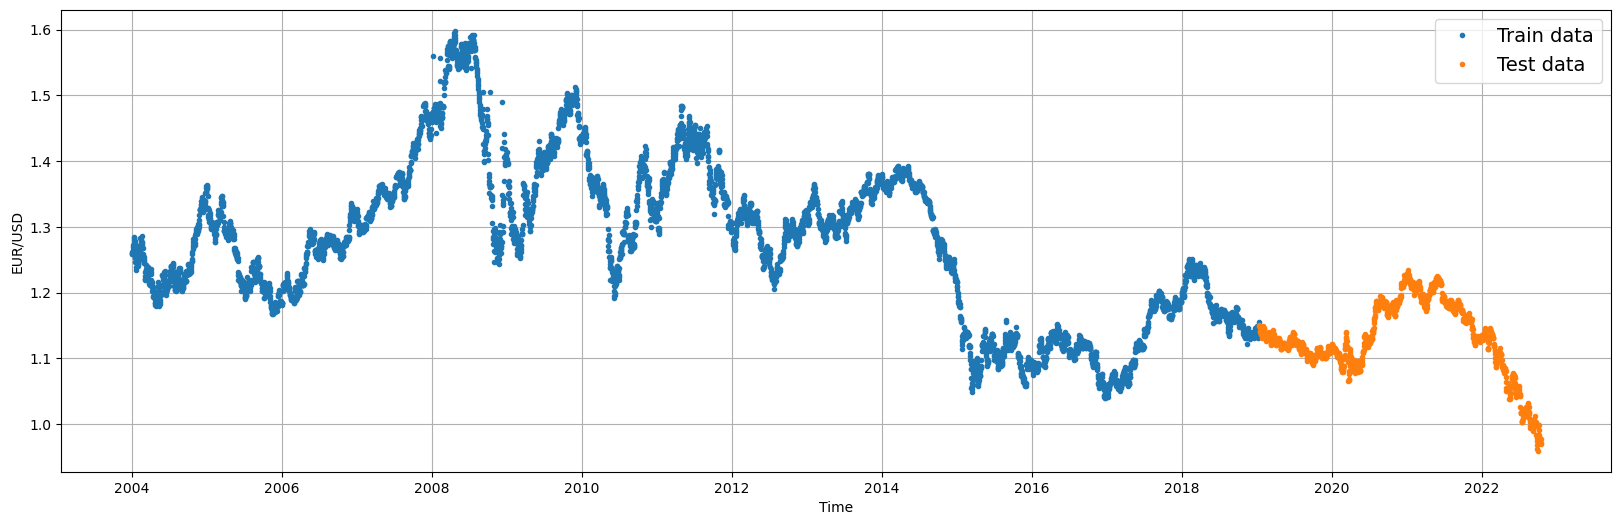

In [67]:
plt.figure(figsize=(20, 6))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

# Modelling Experiments


| Model Number | Model Type | Horizon size | Window size | Extra data |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Na√Øve model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Same as 1 | 1 | 30 | NA | 
| 3 | Same as 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Same as 1 (but with multivariate data) | 1 | 7 | Block reward size |
| 7 | [N-BEATs Algorithm](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |
| 8 | Ensemble (multiple models optimized on different loss functions) | 1 | 7 | NA | 
| 9 | Future prediction model (model to predict future values) | 1 | 7 | NA| 
| 10 | Same as 1 (but with turkey ü¶É data introduced) | 1 | 7 | NA |


horizon: s·ªë b∆∞·ªõc d·ª± ƒëo√°n trong t∆∞∆°ng lai (ng√†y)

window size: s·ªë b∆∞·ªõc trong qu√° kh·ª© d√πng ƒë·ªÉ d·ª± ƒëo√°n (ng√†y)

## Model 0:  Na√Øve model

In [68]:
# Kh·ªüi t·∫°o 
naive_forecast = y_test[:-1] # Kh·ªüi t·∫°o kh√¥ng bao g·ªìm gi√° tr·ªã cu·ªëi c√πng 
naive_forecast[:10], naive_forecast[-10:] 

(array([1.151517  , 1.14977   , 1.148023  , 1.146276  , 1.147315  ,
        1.141409  , 1.1399    , 1.139186  , 1.13830533, 1.13742467]),
 array([0.983207  , 0.998432  , 0.9911    , 0.978905  , 0.97710367,
        0.97530233, 0.973501  , 0.971006  , 0.970017  , 0.970798  ]))

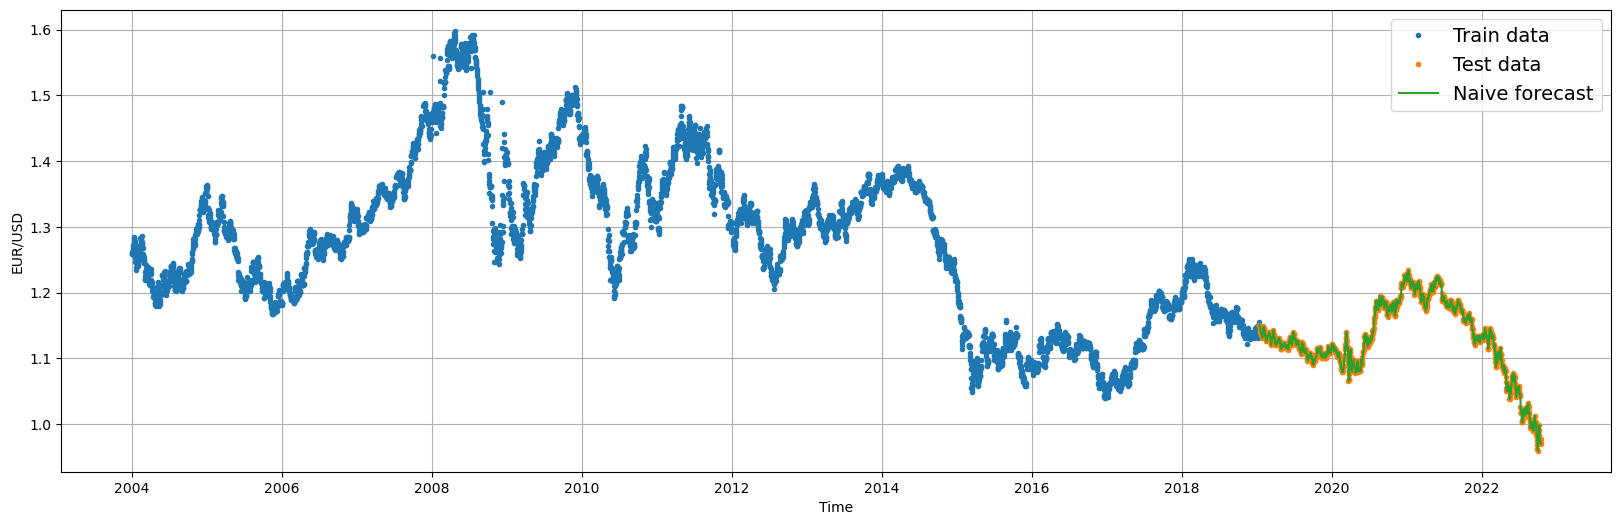

In [69]:
plt.figure(figsize=(20, 6))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

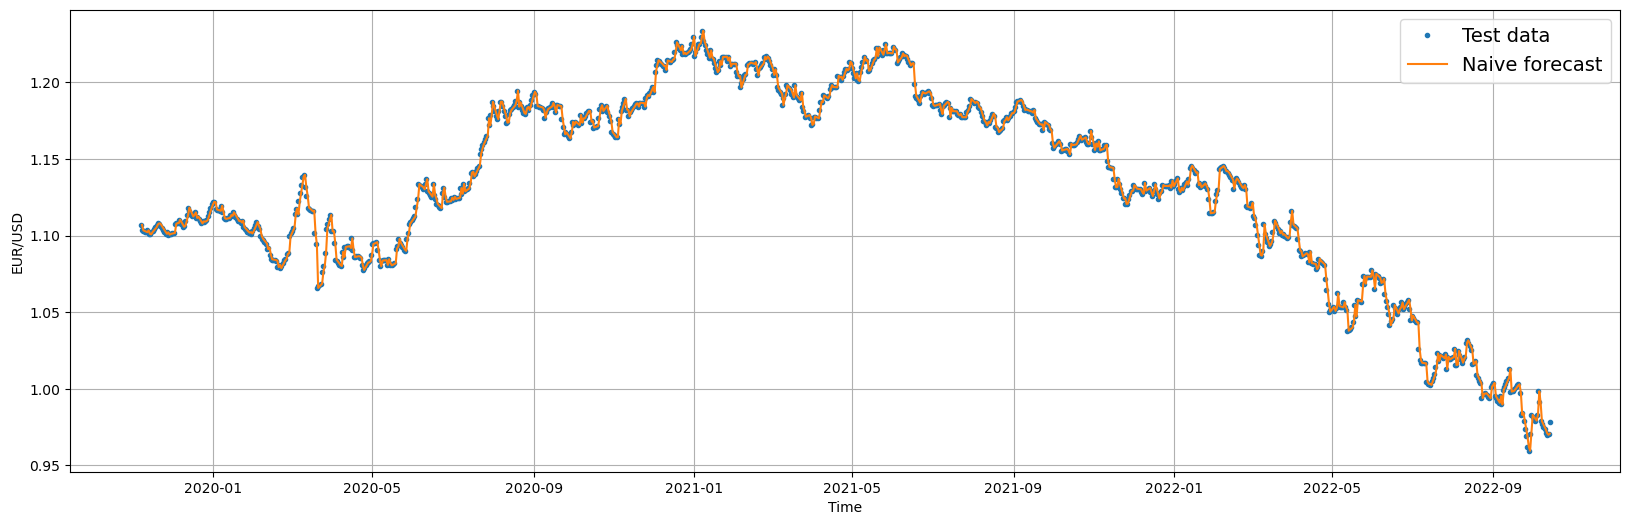

In [70]:
plt.figure(figsize=(20, 6))
offset = 300
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [71]:
import tensorflow as tf

In [72]:
# H√†m t√≠nh MASE 
def mean_absolute_scaled_error(y_true, y_pred):
  
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) 

  return mae / mae_naive_no_season

In [73]:
# H√†m ƒë√°nh gi√° hi·ªáu qu·∫£ d·ª± ƒëo√°n c·ªßa m√¥ h√¨nh 
def evaluate_preds(y_true, y_pred):

  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [74]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 0.002583291,
 'mse': 1.433463e-05,
 'rmse': 0.00378611,
 'mape': 0.23079406,
 'mase': 0.99976385}

In [75]:
tf.reduce_mean(y_test).numpy()

1.1299836434814274

## Kh·ªüi t·∫°o d·ªØ li·ªáu: horizon = 1, window  = 7 
V√≠ d·ª•: 

[1,2,3,4,5,6,7] -> 8

[2,3,4,5,6,7,8] -> 9 

[3,4,5,6,7,8,9] -> 10 

In [76]:
# S·ª≠ d·ª•ng d·ªØ li·ªáu 7 ng√†y li√™n ti·∫øp ƒë·ªÉ d·ª± ƒëo√°n 1 ng√†y ti·∫øp theo 
HORIZON = 1 
WINDOW_SIZE = 7 


In [77]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  V√≠ d·ª•: 
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [78]:
# Test h√†m get_labelled_windows()
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [79]:
def make_windows(x, window_size=7, horizon=1):
  
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

    windowed_array = x[window_indexes]

    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels

# Ngu·ªìn tham kh·∫£o: (https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5)

In [80]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [81]:
# Ki·ªÉm tra 3 c√°i ƒë·∫ßu ti√™n 
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [1.259002 1.258194 1.260097 1.262    1.263903 1.268907 1.272394] -> Label: [1.264095]
Window: [1.258194 1.260097 1.262    1.263903 1.268907 1.272394 1.264095] -> Label: [1.277498]
Window: [1.260097 1.262    1.263903 1.268907 1.272394 1.264095 1.277498] -> Label: [1.27993267]


In [82]:
# Chia t·∫≠p train-test t·ªâ l·ªá 80-20

def make_train_test_splits(windows, labels, test_split=0.2):

  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [83]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(5484, 1371, 5484, 1371)

In [84]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Modelling checkpoint 

S·ª≠ d·ª•ng:  [`ModelCheckpoint`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint). 

=> Theo d√µi hi·ªáu su·∫•t t·ªët nh·∫•t c·ªßa model v√† l∆∞u l·∫°i, khi ƒë√°nh gi√° s·∫Ω s·ª≠ d·ª•ng c·∫•u h√¨nh t·ªët nh·∫•t c·ªßa model.

In [85]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), 
                                            verbose=0, 
                                            save_best_only=True) # Ch·ªâ l∆∞u model t·ªët nh·∫•t v√†o t·ªáp 

## Model 1: Dense model (window = 7, horizon = 1)

In [86]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")], name="model_1_dense") 


model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) 


model_1.fit(x=train_windows, 
            y=train_labels, 
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) 

Epoch 1/100
43/43 [==============================] - 1s 20ms/step - loss: 0.1366 - mae: 0.1366 - val_loss: 0.0255 - val_mae: 0.0255
Epoch 2/100
43/43 [==============================] - 0s 12ms/step - loss: 0.0106 - mae: 0.0106 - val_loss: 0.0076 - val_mae: 0.0076
Epoch 3/100
43/43 [==============================] - 0s 2ms/step - loss: 0.0093 - mae: 0.0093 - val_loss: 0.0088 - val_mae: 0.0088
Epoch 4/100
43/43 [==============================] - 0s 12ms/step - loss: 0.0089 - mae: 0.0089 - val_loss: 0.0069 - val_mae: 0.0069
Epoch 5/100
43/43 [==============================] - 0s 12ms/step - loss: 0.0092 - mae: 0.0092 - val_loss: 0.0053 - val_mae: 0.0053
Epoch 6/100
43/43 [==============================] - 0s 12ms/step - loss: 0.0087 - mae: 0.0087 - val_loss: 0.0053 - val_mae: 0.0053
Epoch 7/100
43/43 [==============================] - 0s 12ms/step - loss: 0.0089 - mae: 0.0089 - val_loss: 0.0052 - val_mae: 0.0052
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 0.00

In [87]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

43/43 [==============================] - 0s 1ms/step - loss: 0.0034 - mae: 0.0034


[0.0034057111479341984, 0.0034057111479341984]

In [88]:
# T·∫°o h√†m ƒë·ªÉ model d·ª± ƒëo√°n 
def make_preds(model, input_data):

  forecast = model.predict(input_data)
  return tf.squeeze(forecast) 

In [89]:
# ƒê√°nh gi√° cu·ªëi c√πng 
def model_results(model):
    model_preds = make_preds(model, input_data=test_windows)

    model_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_preds)
    print(model_results)

In [90]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

43/43 [==============================] - 0s 1ms/step


(1371,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([1.1505203, 1.1490889, 1.1479268, 1.1469069, 1.1452134, 1.1425176,
        1.1409802, 1.1396742, 1.1386346, 1.1382003], dtype=float32)>)

In [91]:
model_results(model_1)

43/43 [==============================] - 0s 1ms/step
{'mae': 0.0034057114, 'mse': 2.212644e-05, 'rmse': 0.004703875, 'mape': 0.30496076, 'mase': 1.3177387}


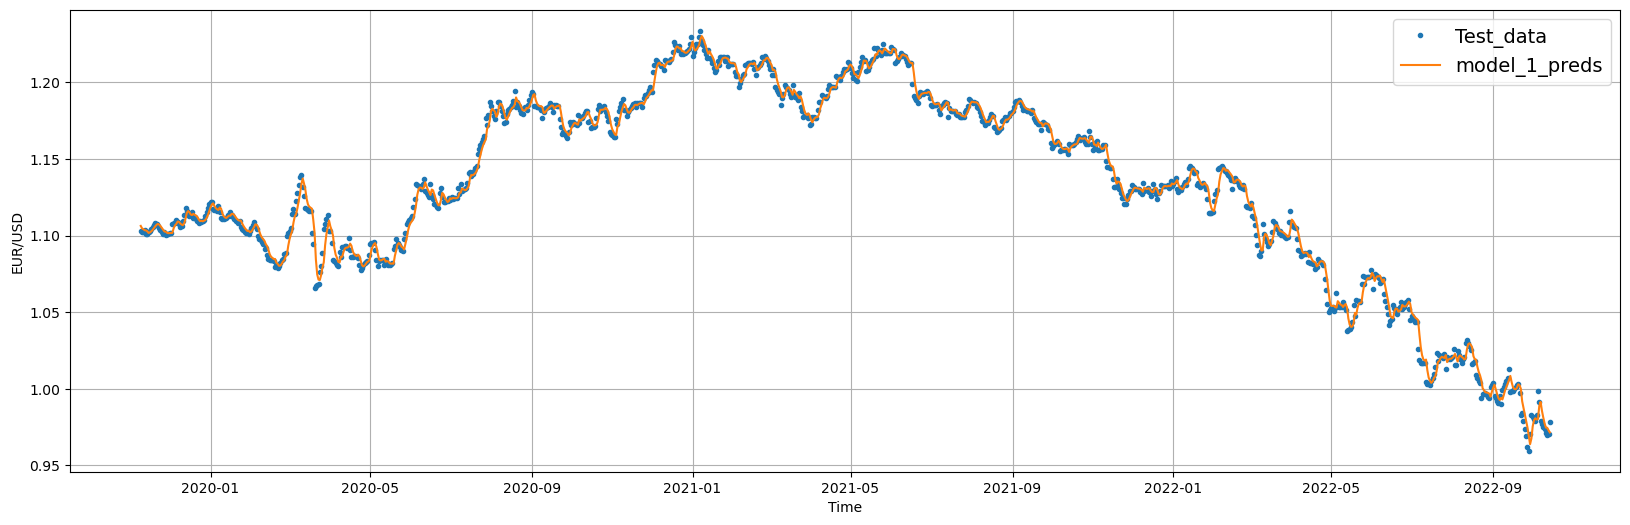

In [92]:
offset = 300
plt.figure(figsize=(20,6))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [93]:
HORIZON = 1 
WINDOW_SIZE = 30 

In [94]:
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) 
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [95]:
# ƒê√°nh gi√° model 2 
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

43/43 [==============================] - 0s 1ms/step - loss: 0.0034


0.0034057111479341984

In [96]:
model_results(model_2)

43/43 [==============================] - 0s 1ms/step
{'mae': 0.0034057114, 'mse': 2.212644e-05, 'rmse': 0.004703875, 'mape': 0.30496076, 'mase': 1.3177387}


In [97]:
model_2_preds = make_preds(model_2, input_data=test_windows)

model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_2_preds)
model_2_results

43/43 [==============================] - 0s 1ms/step


{'mae': 0.0034057114,
 'mse': 2.212644e-05,
 'rmse': 0.004703875,
 'mape': 0.30496076,
 'mase': 1.3177387}

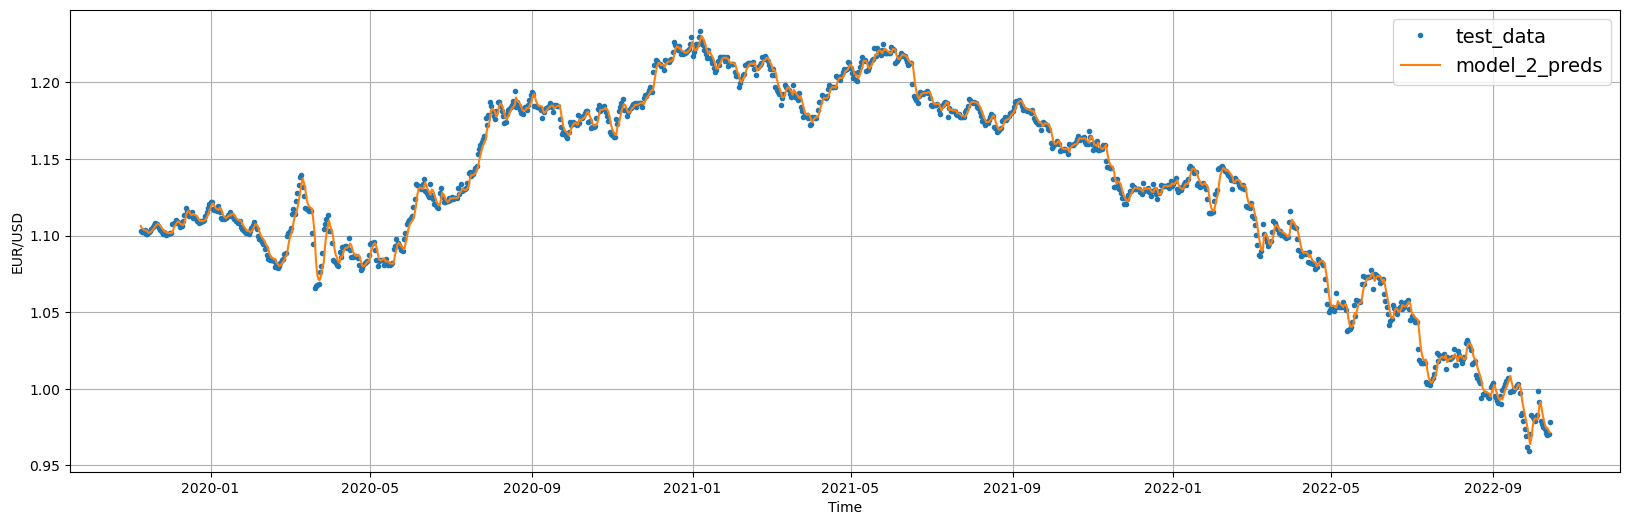

In [98]:
offset = 300
plt.figure(figsize=(20, 6))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 

## Model 3: Dense (window = 30, horizon = 7)

In [99]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(6826, 6826)

In [100]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(5460, 1366, 5460, 1366)

In [101]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: mod

In [102]:
model_3.evaluate(test_windows, test_labels) 

model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

model_3_preds = make_preds(model_3,
                           input_data=test_windows)

model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results                           

43/43 [==============================] - 0s 1ms/step


{'mae': array([0.00303262, 0.00623361, 0.00793558, ..., 0.00908975, 0.01172276,
        0.01425289], dtype=float32),
 'mse': array([1.2826278e-05, 4.7732086e-05, 8.3331135e-05, ..., 9.3032257e-05,
        1.6735440e-04, 2.1832433e-04], dtype=float32),
 'rmse': array([0.00358138, 0.00690884, 0.00912859, ..., 0.00964532, 0.01293655,
        0.0147758 ], dtype=float32),
 'mape': array([0.2652908 , 0.54613435, 0.6963471 , ..., 0.93139213, 1.2051508 ,
        1.4647397 ], dtype=float32),
 'mase': 3.0093994}